In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [3]:
df = pd.read_csv(r"D:\Imarticus\Machine Learning\Linear regression\cost_prediction.csv")

In [4]:
df

,age,sex,smoker,region,blood_pressure,cholesterol,glucose,exercise_hours_per_week,alcohol_consumption,diet_score,medical_cost
0,56.0,female,yes,northeast,105.0,171.0,154.0,1.6,5.8,7,32272.79
1,46.0,female,no,northeast,101.0,154.0,142.0,8.7,5.7,6,12004.64
2,32.0,male,no,southeast,105.0,288.0,NaN,4.9,4.7,6,10698.80
3,60.0,male,no,southeast,125.0,288.0,NaN,1.7,2.3,2,17104.45
4,25.0,female,no,northwest,91.0,288.0,135.0,8.9,3.8,6,7706.10
...,...,...,...,...,...,...,...,...,...,...,...
4576,28.0,male,no,northeast,119.0,239.0,135.0,5.4,6.7,9,11131.31
4577,33.0,female,no,northwest,123.0,224.0,108.0,1.3,0.5,7,6202.71
4578,35.0,female,no,southwest,141.0,234.0,97.0,10.0,3.8,10,13863.63
4579,47.0,male,no,southwest,128.0,154.0,103.0,10.7,0.4,5,17303.44


In [5]:
df.describe()

,age,blood_pressure,cholesterol,glucose,exercise_hours_per_week,alcohol_consumption,diet_score,medical_cost
count,4398.000000,4444.000000,4352.000000,4307.000000,4581.000000,4581.000000,4581.000000,4581.000000
mean,41.257162,119.892664,224.527114,124.811702,5.916699,4.980965,5.527177,17771.693794
std,13.506643,17.167312,43.172833,31.373535,3.466743,2.867899,2.865236,7708.657213
min,18.000000,90.000000,150.000000,70.000000,0.000000,0.000000,1.000000,-508.780000
25%,30.000000,105.000000,187.000000,98.000000,2.900000,2.600000,3.000000,12363.010000
50%,41.000000,120.000000,225.000000,125.000000,5.900000,4.900000,6.000000,16542.090000
75%,53.000000,135.000000,262.000000,152.000000,8.900000,7.400000,8.000000,21694.590000
max,64.000000,149.000000,299.000000,179.000000,12.000000,10.000000,10.000000,45024.920000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4581 entries, 0 to 4580
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      4398 non-null   float64
 1   sex                      4581 non-null   object 
 2   smoker                   4581 non-null   object 
 3   region                   4581 non-null   object 
 4   blood_pressure           4444 non-null   float64
 5   cholesterol              4352 non-null   float64
 6   glucose                  4307 non-null   float64
 7   exercise_hours_per_week  4581 non-null   float64
 8   alcohol_consumption      4581 non-null   float64
 9   diet_score               4581 non-null   int64  
 10  medical_cost             4581 non-null   float64
dtypes: float64(7), int64(1), object(3)
memory usage: 393.8+ KB


In [7]:
df.isnull().sum()

age                        183
sex                          0
smoker                       0
region                       0
blood_pressure             137
cholesterol                229
glucose                    274
exercise_hours_per_week      0
alcohol_consumption          0
diet_score                   0
medical_cost                 0
dtype: int64

In [8]:
df['age'].median()

41.0

In [9]:
df['age'] = df['age'].fillna(df['age'].median())

In [10]:
df.isnull().sum()

age                          0
sex                          0
smoker                       0
region                       0
blood_pressure             137
cholesterol                229
glucose                    274
exercise_hours_per_week      0
alcohol_consumption          0
diet_score                   0
medical_cost                 0
dtype: int64

In [11]:
df['blood_pressure'].mean()

np.float64(119.89266426642665)

In [12]:
df['blood_pressure'] = df['blood_pressure'].fillna(df['blood_pressure'].median())

In [13]:
df['cholesterol'].median()

225.0

In [14]:
df['cholesterol'] = df['cholesterol'].fillna(df['cholesterol'].median())

In [15]:
df['glucose'].median()

125.0

In [16]:
df['glucose'] = df['glucose'].fillna(df['glucose'].median())

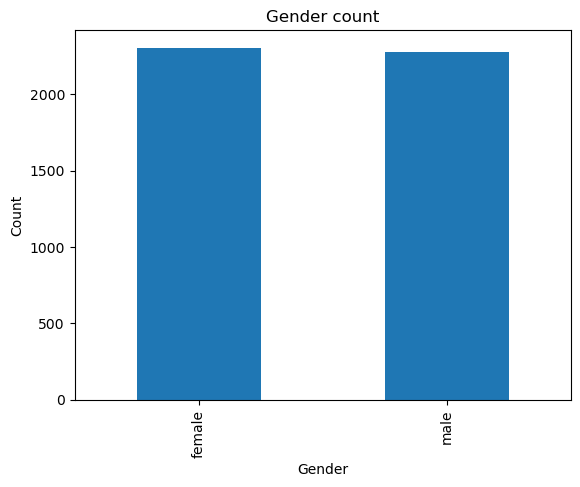

In [17]:
df['sex'].value_counts().plot(kind='bar')
plt.title("Gender count")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


Inference:

Male and female counts are nearly equal → good balance.

In [18]:
df['sex'].value_counts()

sex
female    2305
male      2276
Name: count, dtype: int64

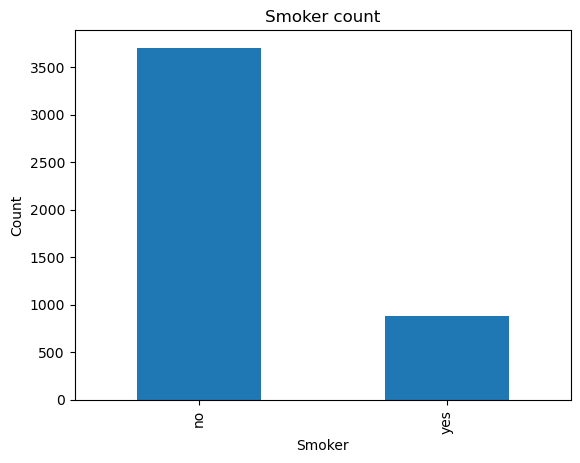

In [19]:
df['smoker'].value_counts().plot(kind='bar')
plt.title("Smoker count")
plt.xlabel("Smoker")
plt.ylabel("Count")
plt.show()

Inference:

Most people are non-smokers.

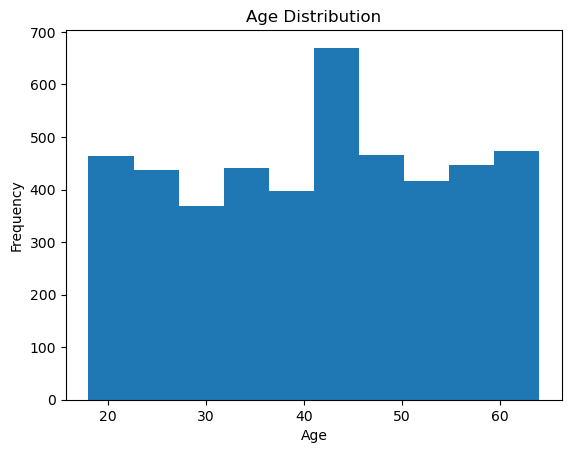

In [21]:
plt.hist(df['age'])
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

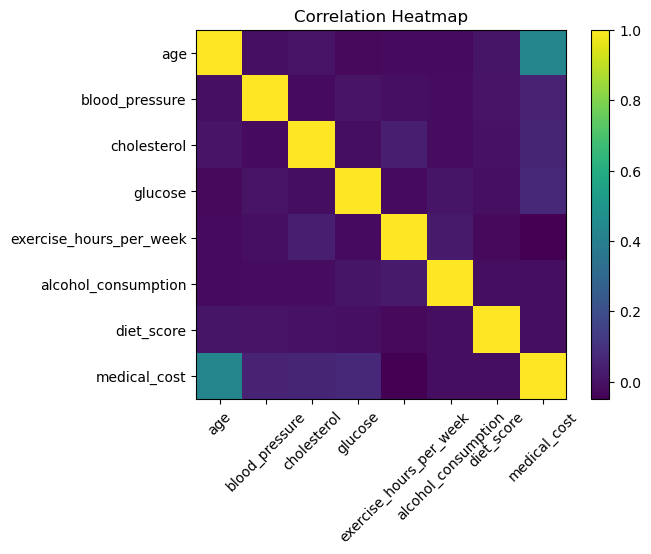

In [22]:
corr = df.corr(numeric_only=True)
plt.imshow(corr, cmap="viridis", interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Heatmap")
plt.show()

Inference: Age has the highest correlation with medical cost.

Cholesterol, glucose, BP show weak correlations.

Exercise, diet, and alcohol show very weak correlation.

Smoking is categorical, so not included — but boxplot proves smoking is highly impactful.

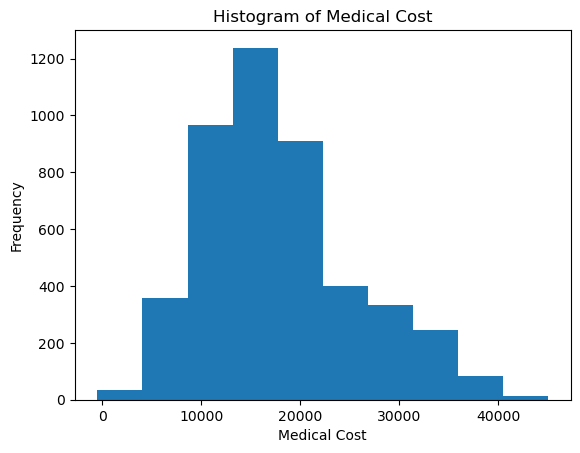

In [23]:
plt.hist(df['medical_cost'])
plt.title("Histogram of Medical Cost")
plt.xlabel("Medical Cost")
plt.ylabel("Frequency")
plt.show()

Inference:

Medical_cost is right-skewed, meaning:

Majority of people have costs between 10,000–20,000.

Some outliers reach above 40,000, indicating high-risk individuals.

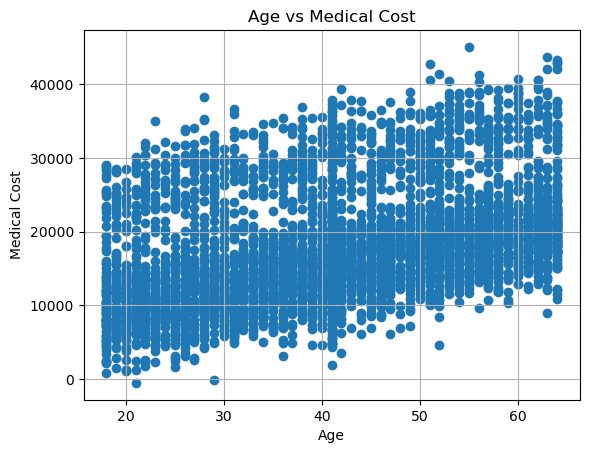

In [24]:
plt.scatter(df['age'], df['medical_cost'])
plt.title("Age vs Medical Cost")
plt.xlabel("Age")
plt.ylabel("Medical Cost")
plt.grid(True)
plt.show()


Inference:

Medical cost rises as age increases.

Younger people have more scattered and lower costs.

After age 50, the trend becomes clearer.

C:\Users\visha\AppData\Local\Temp\ipykernel_9932\652500699.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([


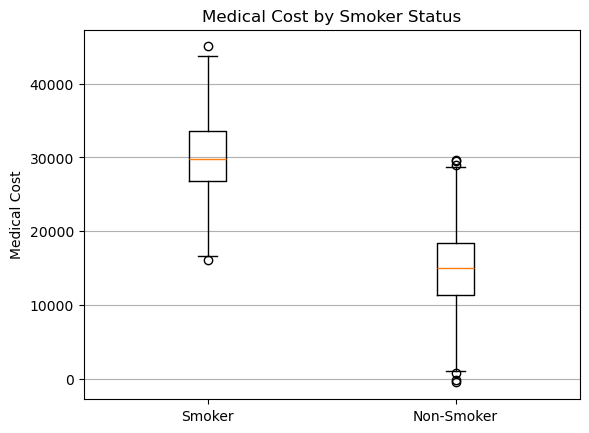

In [25]:
plt.boxplot([
    df[df['smoker']=='yes']['medical_cost'],
    df[df['smoker']=='no']['medical_cost']
], labels=['Smoker','Non-Smoker'])

plt.title("Medical Cost by Smoker Status")
plt.ylabel("Medical Cost")
plt.grid(axis="y")
plt.show()

Inference:

Most people are non-smokers:

Smoker group is smaller

But has much higher cost (as seen in boxplot)

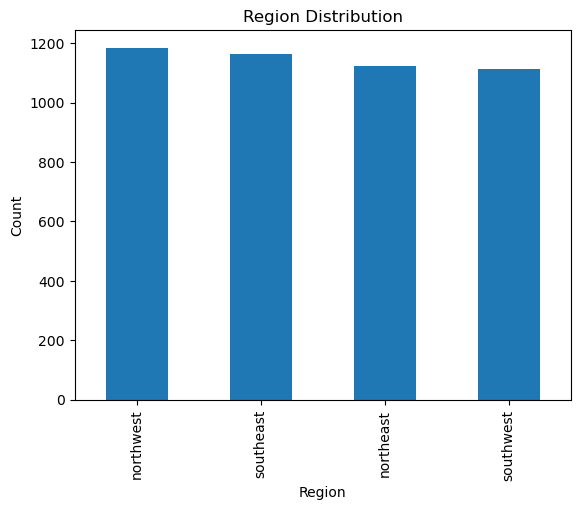

In [27]:
df['region'].value_counts().plot(kind='bar')
plt.title("Region Distribution")
plt.xlabel("Region")
plt.ylabel("Count")
plt.show()

Inference:

The chart shows the count of individuals from each region: northwest, southeast, northeast, southwest.

All four regions have almost equal number of individuals (around 1100–1200 each).

This indicates the dataset is well-balanced across regions. No region dominates significantly, so region will not introduce bias in your machine learning model.

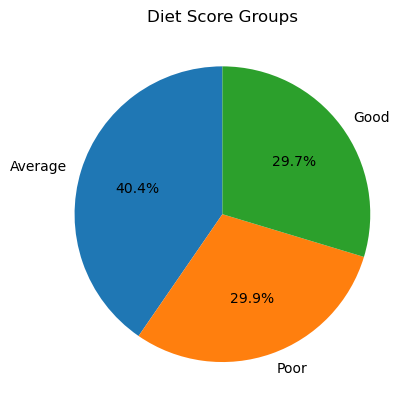

In [29]:
df['diet_group'] = pd.cut(df['diet_score'], bins=[0,3,7,10], labels=['Poor','Average','Good'])

df['diet_group'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    ylabel=''
)
plt.title("Diet Score Groups")
plt.show()

Inference:

The distribution shows how the population’s diet quality varies:

If Average has the largest percentage → most people follow a moderate diet.

If Poor is large → many individuals have unhealthy eating habits.

If Good is high → population tends to maintain a healthy diet routine.